In [1]:
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def fit_predict_report(train_x, test_x, train_y, test_y, k, pipeline, classifier_name):
    parameter_grid = {'selection__k': [k]}

    grid_search = GridSearchCV(pipeline, param_grid = parameter_grid, refit = True)
    
    predict_train = grid_search.fit(train_x, train_y).predict(train_x)
    predict_test = grid_search.predict(test_x)
    return predict_train, predict_test

In [3]:
def print_accuracy(train_y, predict_train, test_y, predict_test, classifier_name):   
    print('Accuracy:-')
    print('Accuracy score for ' + classifier_name + ' (Train v/s test)')
    print(str(accuracy_score(train_y, predict_train)) +' '+ str(accuracy_score(test_y, predict_test)))

In [4]:
def plot_confusion_matrix(cm_y, cm_predict_y):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(cm_y, cm_predict_y), annot=True, ax = ax, fmt = 'g')
    sns.despine()

In [5]:
train_data = pd.read_csv('train.txt', sep = '\t', header = None)
np_train_data = train_data.values
print(np_train_data.shape)


X = np_train_data[:, 0]
y = np_train_data[:, 1]

test_data = pd.read_csv('test-gold.txt', sep = '\t', header = None)
np_test_data = test_data.values
print(np_test_data.shape)


test_x = np_test_data[:, 0]
test_y = np_test_data[:, 1]

(236135, 2)
(13229, 2)


In [6]:
pipeDecisionTree = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('selection', SelectKBest(chi2)),
        ('decision_tree', DecisionTreeClassifier())
        ])
# Reference for multinomial naive bayes
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
pipeNaiveBayes = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('selection', SelectKBest(chi2)),
        ('naive_bayes', MultinomialNB())
        ])
#Reference for multinomial logistic regression
# http://dataaspirant.com/2017/05/15/implement-multinomial-logistic-regression-python/
pipeLogisticReg = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('selection', SelectKBest(chi2)),
        ('log_reg', LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg'))
        ])

pipeLinearSVC = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('selection', SelectKBest(chi2)),
        ('linear_svc', LinearSVC(multi_class = 'ovr'))
        ])

DecisionTree for k = 100

In [7]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 100, pipeDecisionTree, 'DecisionTree')
print_accuracy(y, predict_train, test_y, predict_test, 'DecisionTree')

Accuracy:-
Accuracy score for DecisionTree (Train v/s test)
0.854638236602 0.634893038023


Train Confusion Matrix Plot:-

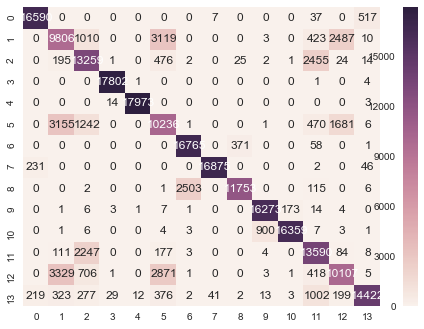

In [8]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix Plot:-

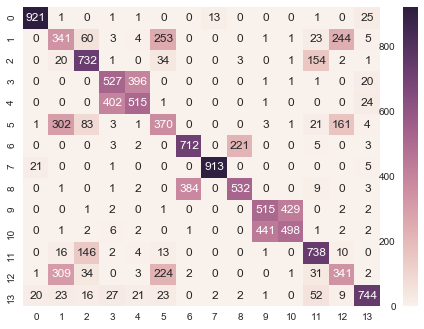

In [9]:
plot_confusion_matrix(test_y, predict_test)

DecisionTree for k = 150

In [10]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 150, pipeDecisionTree, 'DecisionTree')
print_accuracy(y, predict_train, test_y, predict_test, 'DecisionTree')

Accuracy:-
Accuracy score for DecisionTree (Train v/s test)
0.916285175853 0.672235240759


Train Confusion Matrix Plot:-

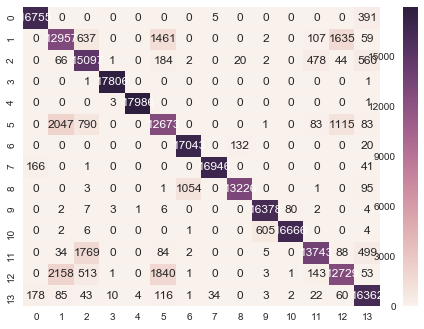

In [11]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix Plot:-

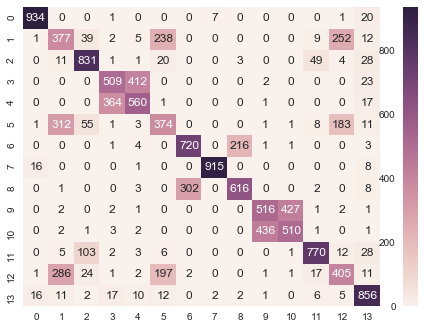

In [12]:
plot_confusion_matrix(test_y, predict_test)

Naive Bayes for k = 100

In [13]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 100, pipeNaiveBayes, 'Naive Bayes')
print_accuracy(y, predict_train, test_y, predict_test, 'Naive Bayes')

Accuracy:-
Accuracy score for Naive Bayes (Train v/s test)
0.636877210071 0.628316577217


Train Confustion Matrix:

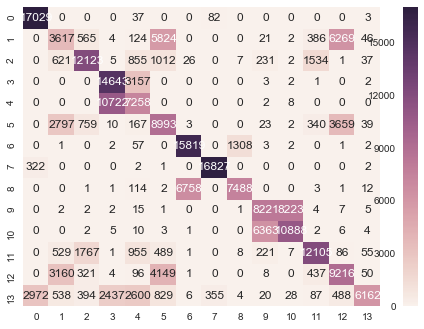

In [14]:
plot_confusion_matrix(y, predict_train)

Test Confustion Matrix:

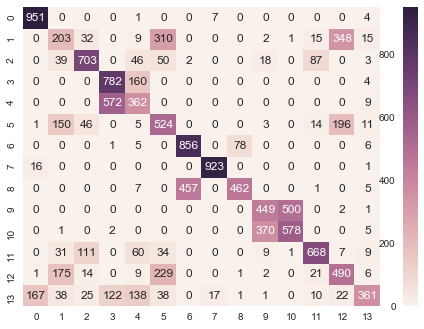

In [15]:
plot_confusion_matrix(test_y, predict_test)

Naive Bayes for k = 150

In [16]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 150, pipeNaiveBayes, 'Naive Bayes')
print_accuracy(y, predict_train, test_y, predict_test, 'Naive Bayes')

Accuracy:-
Accuracy score for Naive Bayes (Train v/s test)
0.684803184619 0.685085796356


Train Confusion Matrix:

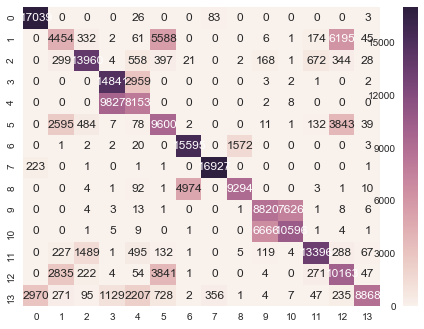

In [17]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix:

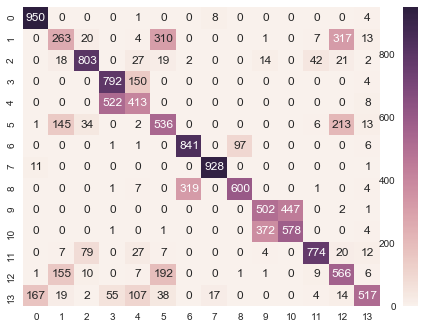

In [18]:
plot_confusion_matrix(test_y, predict_test)

Logistic Regression for k = 100

In [19]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 100, pipeLogisticReg, 'Logistic Regression')
print_accuracy(y, predict_train, test_y, predict_test, 'Logistic Regression')

Accuracy:-
Accuracy score for Logistic Regression (Train v/s test)
0.679780633959 0.668077708066


Train Confusion Matrix:

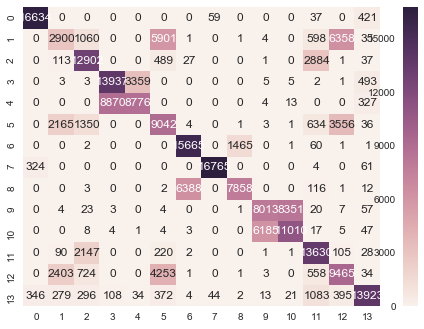

In [20]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix:

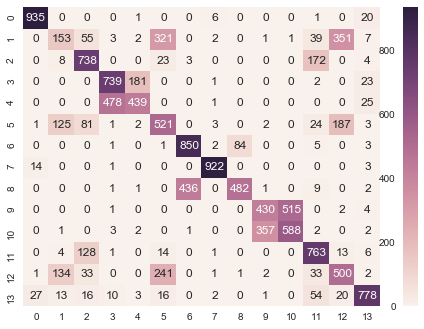

In [21]:
plot_confusion_matrix(test_y, predict_test)

Logistic Regression for k = 150

In [22]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 150, pipeLogisticReg, 'Logistic Regression')
print_accuracy(y, predict_train, test_y, predict_test, 'Logistic Regression')

Accuracy:-
Accuracy score for Logistic Regression (Train v/s test)
0.718868443899 0.712979061154


Train Confusion Matrix:

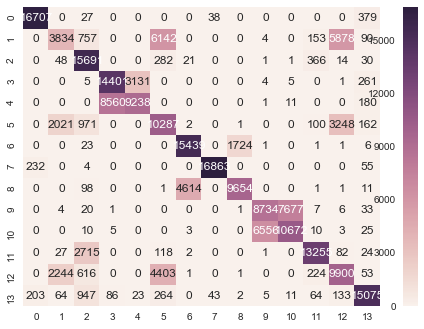

In [23]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix:

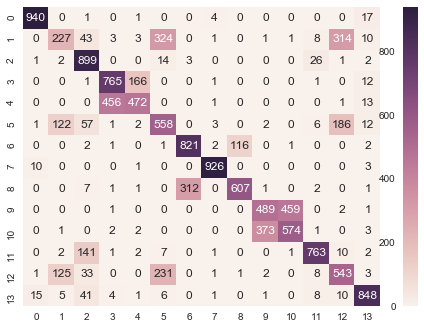

In [24]:
plot_confusion_matrix(test_y, predict_test)

Linear SVC for k = 100

In [25]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 100, pipeLinearSVC, 'Linear SVC')
print_accuracy(y, predict_train, test_y, predict_test, 'Linear SVC')

Accuracy:-
Accuracy score for Linear SVC (Train v/s test)
0.672979439727 0.661954796281


Train Confusion Matrix:

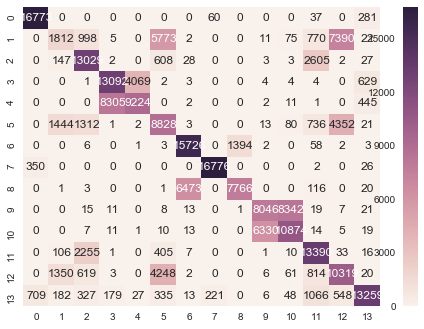

In [26]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix:

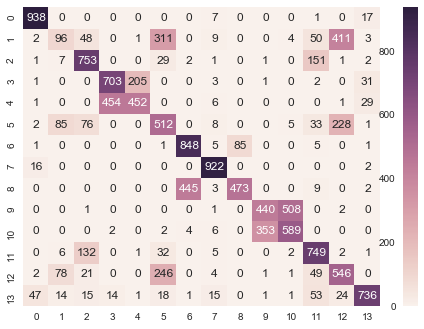

In [27]:
plot_confusion_matrix(test_y, predict_test)

Linear SVC for k = 150

In [28]:
predict_train, predict_test = fit_predict_report(X, test_x, y, test_y, 150, pipeLinearSVC, 'Linear SVC')
print_accuracy(y, predict_train, test_y, predict_test, 'Linear SVC')

Accuracy:-
Accuracy score for Linear SVC (Train v/s test)
0.713358883689 0.708972711467


Train Confusion Matrix:

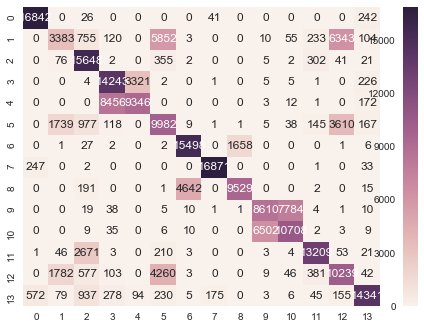

In [29]:
plot_confusion_matrix(y, predict_train)

Test Confusion Matrix:

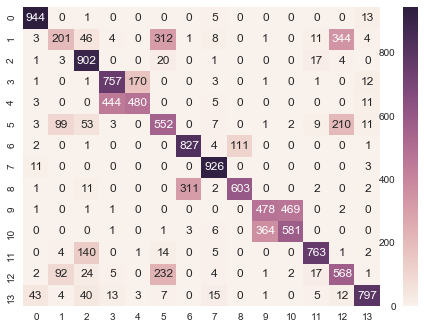

In [30]:
plot_confusion_matrix(test_y, predict_test)